In [1]:
#%pip install transformers
from transformers import GPT2LMHeadModel

In [103]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M parameters
sd_hf = model_hf.state_dict()
print(f"State dict has {len(sd_hf)} entries.")
for k, v in sd_hf.items():
    print(f"  {k}\t{v.shape} = {v.view(-1).size().numel():,}")

# sum up the sizes
total_params = sum([v.view(-1).size().numel() for v in sd_hf.values()])
display(f"Total parameters: {total_params:,}")

State dict has 149 entries.
  transformer.wte.weight	torch.Size([50257, 768]) = 38,597,376
  transformer.wpe.weight	torch.Size([1024, 768]) = 786,432
  transformer.h.0.ln_1.weight	torch.Size([768]) = 768
  transformer.h.0.ln_1.bias	torch.Size([768]) = 768
  transformer.h.0.attn.c_attn.weight	torch.Size([768, 2304]) = 1,769,472
  transformer.h.0.attn.c_attn.bias	torch.Size([2304]) = 2,304
  transformer.h.0.attn.c_proj.weight	torch.Size([768, 768]) = 589,824
  transformer.h.0.attn.c_proj.bias	torch.Size([768]) = 768
  transformer.h.0.ln_2.weight	torch.Size([768]) = 768
  transformer.h.0.ln_2.bias	torch.Size([768]) = 768
  transformer.h.0.mlp.c_fc.weight	torch.Size([768, 3072]) = 2,359,296
  transformer.h.0.mlp.c_fc.bias	torch.Size([3072]) = 3,072
  transformer.h.0.mlp.c_proj.weight	torch.Size([3072, 768]) = 2,359,296
  transformer.h.0.mlp.c_proj.bias	torch.Size([768]) = 768
  transformer.h.1.ln_1.weight	torch.Size([768]) = 768
  transformer.h.1.ln_1.bias	torch.Size([768]) = 768
  transfo

'Total parameters: 163,037,184'

In [24]:
wpe = sd_hf["transformer.wpe.weight"]
wpe.shape

torch.Size([1024, 768])

In [25]:
wpe.view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

In [14]:
# playing with view -1
import torch
r = torch.rand(2,3,4,5)
print(r)
v = r.view(2,-1, 5)
v, v.shape

tensor([[[[0.3142, 0.3229, 0.8674, 0.8102, 0.5279],
          [0.3907, 0.3613, 0.6646, 0.5120, 0.0872],
          [0.7606, 0.8881, 0.1865, 0.2055, 0.0130],
          [0.9820, 0.4567, 0.3209, 0.9216, 0.1381]],

         [[0.3002, 0.8563, 0.0437, 0.7918, 0.3906],
          [0.7974, 0.3590, 0.1625, 0.3940, 0.1587],
          [0.4333, 0.2699, 0.0775, 0.8233, 0.6112],
          [0.3921, 0.5009, 0.3292, 0.8497, 0.7779]],

         [[0.4133, 0.2072, 0.7318, 0.2621, 0.6073],
          [0.9668, 0.0877, 0.0400, 0.7632, 0.5117],
          [0.9305, 0.3236, 0.2008, 0.9827, 0.2825],
          [0.0341, 0.6191, 0.2050, 0.3532, 0.3499]]],


        [[[0.0523, 0.6618, 0.5961, 0.1705, 0.8895],
          [0.8486, 0.7207, 0.2837, 0.8893, 0.1320],
          [0.8569, 0.4695, 0.5130, 0.2675, 0.2854],
          [0.3702, 0.5798, 0.4982, 0.5396, 0.8273]],

         [[0.8679, 0.9372, 0.3048, 0.8637, 0.1446],
          [0.3651, 0.6897, 0.1861, 0.6076, 0.6453],
          [0.5028, 0.0490, 0.3694, 0.1041, 0.8852],
  

(tensor([[[0.3142, 0.3229, 0.8674, 0.8102, 0.5279],
          [0.3907, 0.3613, 0.6646, 0.5120, 0.0872],
          [0.7606, 0.8881, 0.1865, 0.2055, 0.0130],
          [0.9820, 0.4567, 0.3209, 0.9216, 0.1381],
          [0.3002, 0.8563, 0.0437, 0.7918, 0.3906],
          [0.7974, 0.3590, 0.1625, 0.3940, 0.1587],
          [0.4333, 0.2699, 0.0775, 0.8233, 0.6112],
          [0.3921, 0.5009, 0.3292, 0.8497, 0.7779],
          [0.4133, 0.2072, 0.7318, 0.2621, 0.6073],
          [0.9668, 0.0877, 0.0400, 0.7632, 0.5117],
          [0.9305, 0.3236, 0.2008, 0.9827, 0.2825],
          [0.0341, 0.6191, 0.2050, 0.3532, 0.3499]],
 
         [[0.0523, 0.6618, 0.5961, 0.1705, 0.8895],
          [0.8486, 0.7207, 0.2837, 0.8893, 0.1320],
          [0.8569, 0.4695, 0.5130, 0.2675, 0.2854],
          [0.3702, 0.5798, 0.4982, 0.5396, 0.8273],
          [0.8679, 0.9372, 0.3048, 0.8637, 0.1446],
          [0.3651, 0.6897, 0.1861, 0.6076, 0.6453],
          [0.5028, 0.0490, 0.3694, 0.1041, 0.8852],
         

In [31]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


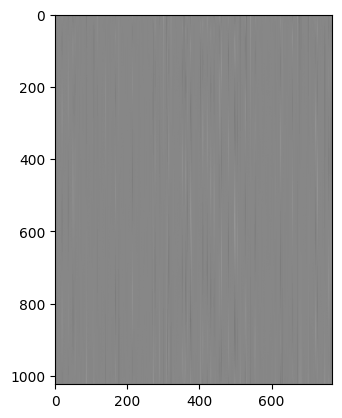

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wpe, cmap="gray")

(-2.0, 2.0)

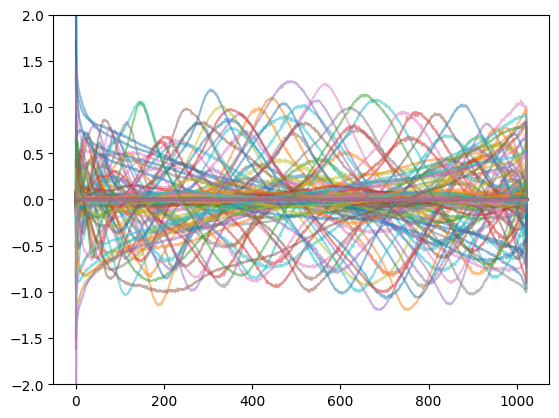

In [54]:
# make a series for each element of the encoding vector, one value for each position
for i in range(0, 768, 1):
   plt.plot(wpe[:, i], alpha=0.5)
# plt.plot(wpe[:, :150])
# plt.plot(wpe[:, :200])
# plt.plot(wpe[:, :250])

# limit y axis range
plt.ylim(-2, 2)

(-2.0, 2.0)

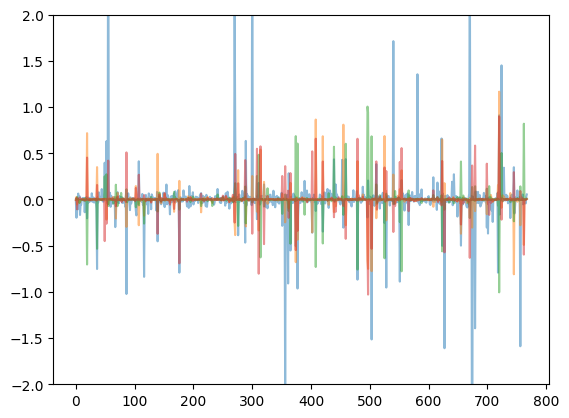

In [57]:
# make a series for each element of the encoding vector, one value for each position
for i in range(0, wpe.shape[0], 300):
   plt.plot(wpe[i, :], alpha=0.5)

# limit y axis range
plt.ylim(-2, 2)

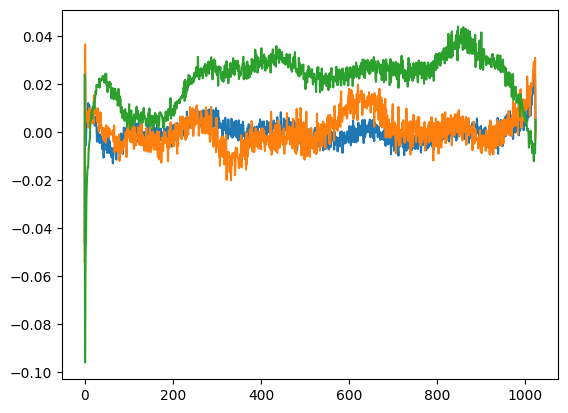

In [40]:
plt.plot(wpe[:, 150])
plt.plot(wpe[:, 200])
plt.plot(wpe[:, 250])


In [66]:
sd_hf["transformer.h.0.attn.c_attn.weight"].shape

torch.Size([768, 2304])

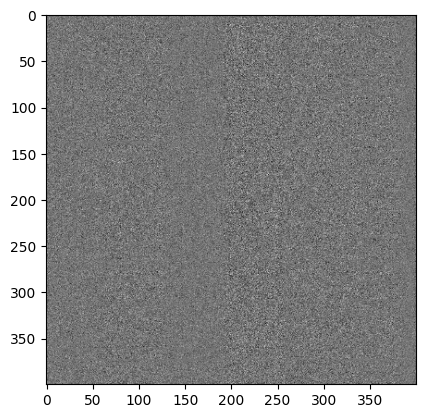

In [73]:
plt.imshow(sd_hf["transformer.h.0.attn.c_attn.weight"][:400, :400], cmap="gray")

In [77]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5, truncation=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [107]:
dict(a=1, b=2)

{'a': 1, 'b': 2}